In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


## ***Data Loading***

In [2]:
df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')

In [3]:
df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


# ***Exploratory Data Analysis***


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [5]:
print(df.describe())

                age        balance      duration      campaign         pdays  \
count  39211.000000   39211.000000  39211.000000  39211.000000  39211.000000   
mean      42.120247    5441.781719    439.062789      5.108770     72.256051   
std       12.709352   16365.292065    769.096291      9.890153    160.942593   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      98.000000    109.000000      1.000000     -1.000000   
50%       40.000000     549.000000    197.000000      2.000000     -1.000000   
75%       50.000000    2030.000000    380.000000      4.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  39211.000000  
mean      11.826171  
std       44.140259  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  


In [6]:
df.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

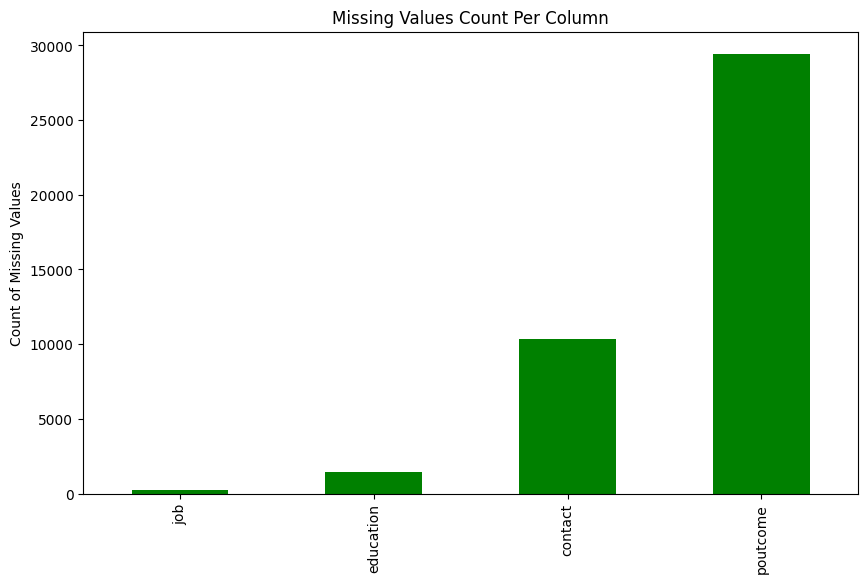

In [7]:
import matplotlib.pyplot as plt
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='green')
plt.title('Missing Values Count Per Column')
plt.ylabel('Count of Missing Values')
plt.show()

## ***Analyzing Numerical Features***


In [61]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    print(col)

age
balance
duration
campaign
pdays
previous


In [8]:
import warnings
warnings.filterwarnings("ignore")

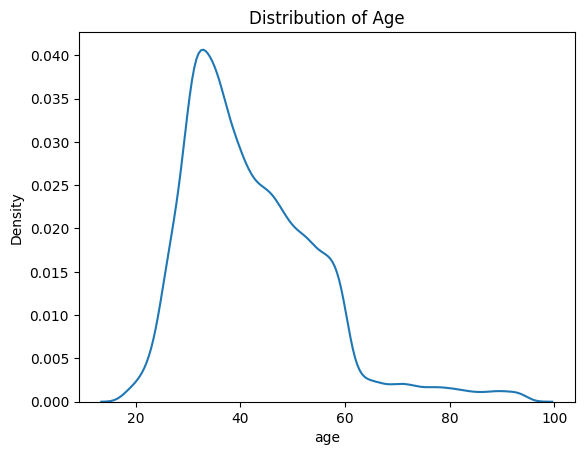

In [9]:
import seaborn as sns
sns.kdeplot(df['age'])
plt.title('Distribution of Age')
plt.show()

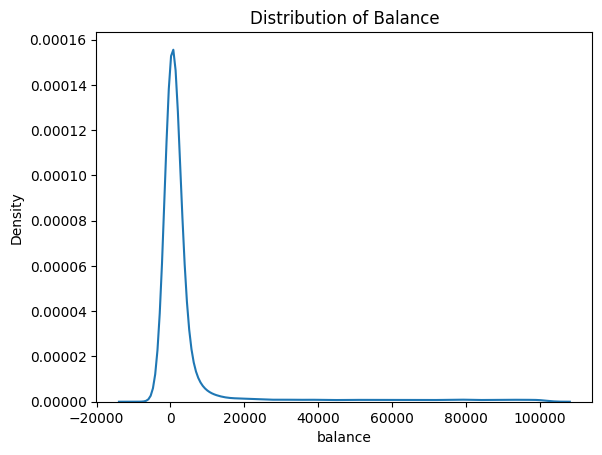

In [10]:
sns.kdeplot(df['balance'])
plt.title('Distribution of Balance')
plt.show()

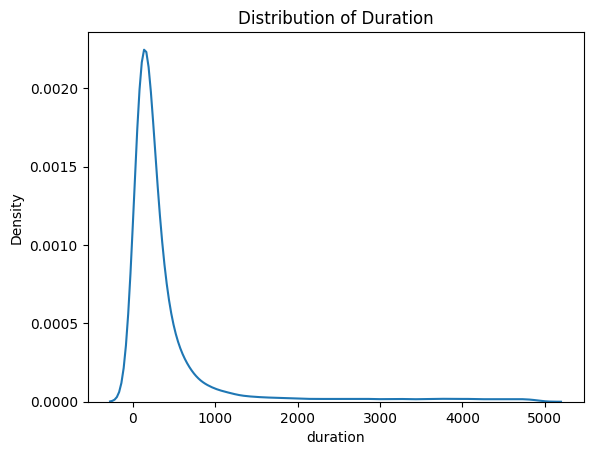

In [65]:
sns.kdeplot(df['duration'])
plt.title('Distribution of Duration')
plt.show()

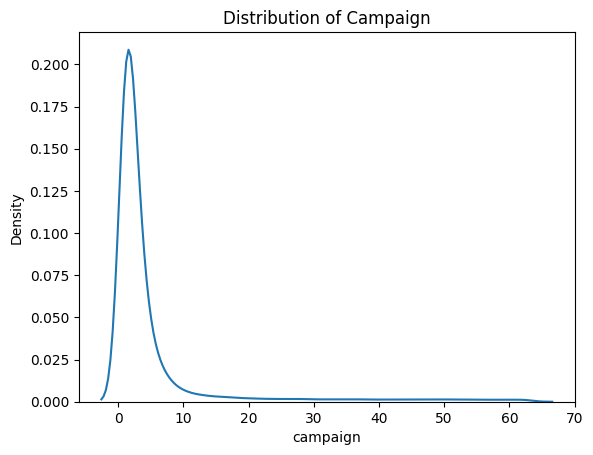

In [66]:
sns.kdeplot(df['campaign'])
plt.title('Distribution of Campaign')
plt.show()

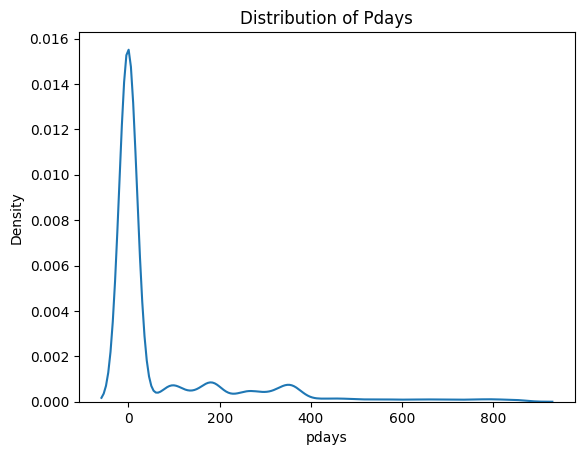

In [67]:
sns.kdeplot(df['pdays'])
plt.title('Distribution of Pdays')
plt.show()

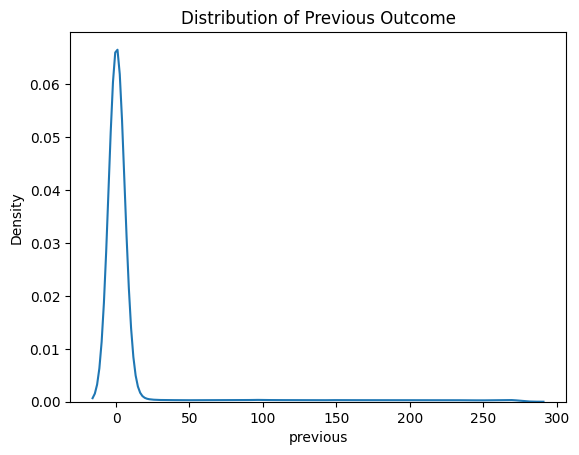

In [68]:
sns.kdeplot(df['previous'])
plt.title('Distribution of Previous Outcome')
plt.show()

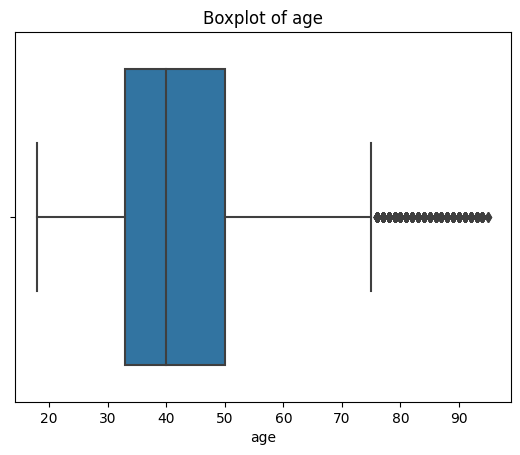

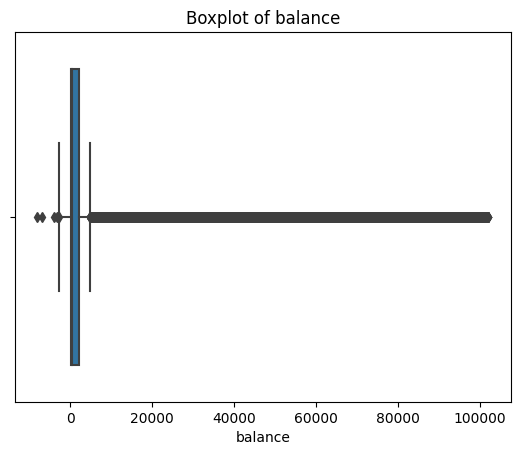

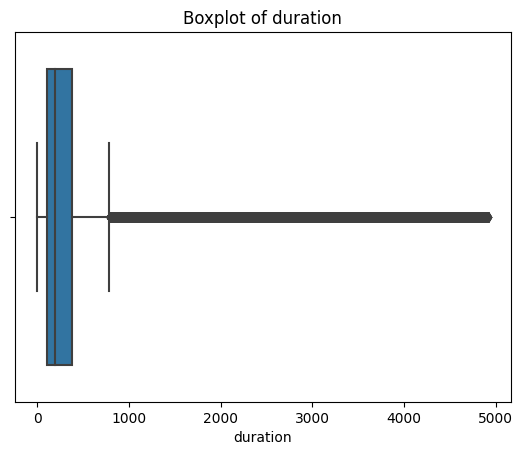

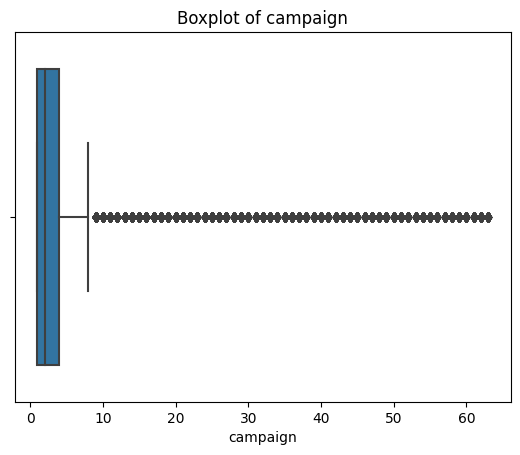

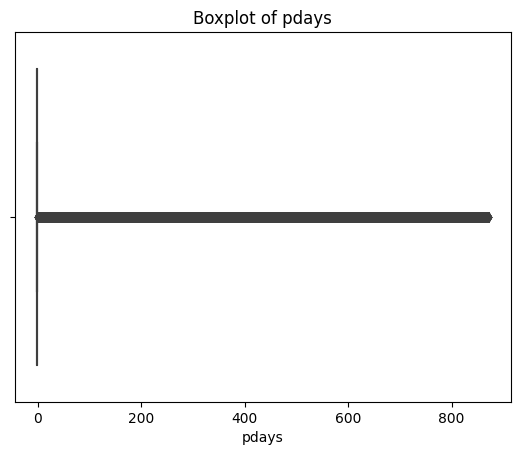

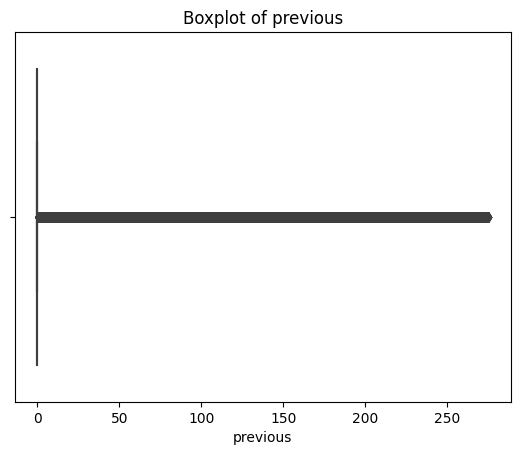

In [69]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [11]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.289150  0.255573  0.269439  0.199507  0.277487
balance   0.289150  1.000000  0.669737  0.674339  0.562097  0.716816
duration  0.255573  0.669737  1.000000  0.630944  0.527020  0.683951
campaign  0.269439  0.674339  0.630944  1.000000  0.519469  0.689211
pdays     0.199507  0.562097  0.527020  0.519469  1.000000  0.586175
previous  0.277487  0.716816  0.683951  0.689211  0.586175  1.000000


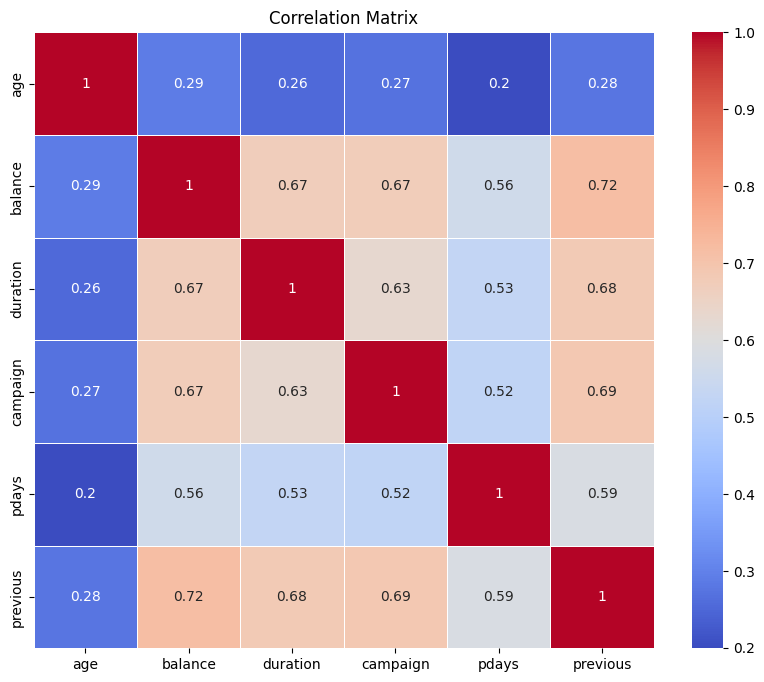

In [12]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    print(df[col].skew())

1.124277825963419
4.0635870169871
3.7005849290063417
3.839592516972888
2.6117734927706215
4.206572876950425


## ***Data Preprocessing***

In [13]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [14]:
X.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN


In [15]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: target, dtype: object

In [16]:
from sklearn.model_selection import *
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train.shape
y_train.shape[0]

31368

In [17]:
X_train.shape

(31368, 15)

In [18]:
X_train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
13800,2009-05-11,46,admin.,single,NaN,no,306,yes,no,cellular,289,5,-1,0,NaN
32874,2008-02-03,43,blue-collar,married,secondary,yes,128,yes,no,cellular,71,1,-1,0,NaN
9072,2008-11-21,32,student,single,secondary,no,0,no,no,cellular,206,1,-1,0,NaN
26803,2010-08-28,47,services,married,secondary,no,5,no,no,cellular,169,1,-1,0,NaN
35504,2009-08-12,45,admin.,married,secondary,no,43,no,no,cellular,114,4,-1,0,NaN


In [19]:
X_train.drop(['last contact date'], axis=1, inplace=True)

In [20]:
#Checking for Null Values in Training Set
X_train.isnull().sum()

age              0
job            185
marital          0
education     1172
default          0
balance          0
housing          0
loan             0
contact       8267
duration         0
campaign         0
pdays            0
previous         0
poutcome     23578
dtype: int64

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
X_train['job'].fillna('unknown', inplace=True)
X_train['education'].fillna('unknown', inplace=True)
X_train['poutcome'].fillna('unknown', inplace=True)
X_train['contact'].fillna('cellular', inplace=True)

In [22]:
X_train['pdays'] = X_train['pdays'].replace(-1, 0)

In [23]:
X_train.loc[X_train['balance'] < 0, 'balance'] = 0

In [24]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

> ***Similar Operations is also done on Test set***

In [25]:
X_test.drop(['last contact date'], axis=1, inplace=True)

In [26]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
19926,42,blue-collar,divorced,secondary,no,898,yes,no,cellular,347,1,-1,0,NaN
9036,28,student,single,secondary,no,24,yes,no,cellular,284,2,196,2,failure
4602,39,NaN,single,NaN,no,0,no,no,telephone,28,1,-1,0,NaN
11641,44,management,married,tertiary,no,0,yes,no,cellular,141,3,-1,0,NaN
7024,28,management,single,tertiary,no,-56,no,yes,cellular,884,1,-1,0,NaN


In [27]:
X_test.shape

(7843, 14)

In [28]:
#Checking for Null Values in Test Set
X_test.isnull().sum()

age             0
job            44
marital         0
education     295
default         0
balance         0
housing         0
loan            0
contact      2069
duration        0
campaign        0
pdays           0
previous        0
poutcome     5873
dtype: int64

In [29]:
X_test['job'].fillna('unknown', inplace=True)
X_test['education'].fillna('unknown', inplace=True)
X_test['poutcome'].fillna('unknown', inplace=True)
X_test['contact'].fillna('cellular', inplace=True)

In [31]:
X_test['pdays'] = X_test['pdays'].replace(-1, 0)

In [32]:
X_test.loc[X_test['balance'] < 0, 'balance'] = 0

In [33]:
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Preprocessing for numerical data using StandardScaler
numerical_transformer = StandardScaler()

# Preprocessing for categorical data using OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Build a pipeline for preprocessing
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessing pipeline on the training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
print(f"X_train shape: {X_train_preprocessed.shape}")
print(f"X_test shape: {X_test_preprocessed.shape}")

X_train shape: (31368, 37)
X_test shape: (7843, 37)


## ***Model Building***

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the entire training set
clf.fit(X_train_preprocessed, y_train)

# Feature Selection using SelectFromModel (based on feature importance)
selector = SelectFromModel(clf, prefit=True)

# Transform the training and test sets to select important features
X_train_selected = selector.transform(X_train_preprocessed)
X_test_selected = selector.transform(X_test_preprocessed)

In [41]:
print(f"Number of features selected: {X_train_selected.shape[1]}")

# Retrain the Random Forest Classifier on the selected features
clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = clf_selected.predict(X_test_selected)

# Evaluate the model
accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

print(f"Random Forest Classifier Accuracy after feature selection: {accuracy_selected:.2f}")
print("Random Forest Classifier Classification Report after feature selection:")
print(report_selected)

Number of features selected: 7
Random Forest Classifier Accuracy after feature selection: 0.86
Random Forest Classifier Classification Report after feature selection:
              precision    recall  f1-score   support

          no       0.90      0.94      0.92      6645
         yes       0.55      0.39      0.46      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.67      0.69      7843
weighted avg       0.84      0.86      0.85      7843



## ***Hyperparameter Tuning***

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Step 2: Perform feature selection using SelectFromModel
selector = SelectFromModel(clf, prefit=True)
X_train_selected = selector.transform(X_train_preprocessed)
X_test_selected = selector.transform(X_test_preprocessed)

print(f"Number of features selected: {X_train_selected.shape[1]}")
param_dist = {
    'n_estimators': np.arange(50, 200, 10),  # Number of trees in the forest
    'max_depth': np.arange(3, 20),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),  # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(1, 10),  # Minimum samples required at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of random combinations to try
                                   scoring='accuracy',  # Use f1_macro as the scoring metric
                                   cv=3,  # 3-fold cross-validation
                                   verbose=2,  # Verbosity for tracking progress
                                   random_state=42,
                                   n_jobs=-1)  
random_search.fit(X_train_selected, y_train)

Number of features selected: 7
Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, scoring='accuracy', verbose=2)

In [39]:
best_params = random_search.best_params_
print(f"Best Parameters for Random Forest: {best_params}")

# Step 7: Retrain the Random Forest classifier with the best parameters on the selected features
best_rf = random_search.best_estimator_
y_pred_selected = best_rf.predict(X_test_selected)

# Step 8: Evaluate the model
accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

print(f"Random Forest Classifier Accuracy after hyperparameter tuning: {accuracy_selected:.2f}")
print("Random Forest Classifier Classification Report after hyperparameter tuning:")
print(report_selected)

Best Parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 17, 'criterion': 'gini', 'bootstrap': True}
Random Forest Classifier Accuracy after hyperparameter tuning: 0.86
Random Forest Classifier Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

          no       0.90      0.94      0.92      6645
         yes       0.56      0.39      0.46      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.67      0.69      7843
weighted avg       0.84      0.86      0.85      7843



In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Classifier
gboost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gboost_clf.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_gboost = gboost_clf.predict(X_test_preprocessed)

# Evaluate the model
accuracy_gboost = accuracy_score(y_test, y_pred_gboost)
report_gboost = classification_report(y_test, y_pred_gboost)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gboost:.2f}")
print("Gradient Boosting Classifier Classification Report:")
print(report_gboost)

Gradient Boosting Classifier Accuracy: 0.86
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.95      0.92      6645
         yes       0.58      0.41      0.48      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.68      0.70      7843
weighted avg       0.85      0.86      0.85      7843



In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Create the Gradient Boosting Classifier
gboost_clf = GradientBoostingClassifier(random_state=42)
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 200, 10),  # Number of trees in the forest
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Learning rate shrinks contribution of each tree
    'max_depth': np.arange(3, 10),  # Maximum depth of the individual trees
    'min_samples_split': np.arange(2, 20, 2),  # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 10),  # Minimum number of samples required to be at a leaf node
    'subsample': np.linspace(0.5, 1.0, 10),  # Fraction of samples used for fitting the individual base learners
}
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gboost_clf, param_distributions=param_dist,
                                   n_iter=50, scoring='f1_macro', cv=4, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_preprocessed, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])},
                   random_state=42, scoring='f1_macro', verbose=2)

In [44]:
best_params = random_search.best_params_
print(f"Best Parameters for Gradient Boosting: {best_params}")

# Evaluate the best model
best_gboost_clf = random_search.best_estimator_
y_pred_gboost = best_gboost_clf.predict(X_test_preprocessed)

# Evaluate the model
accuracy_gboost = accuracy_score(y_test, y_pred_gboost)
report_gboost = classification_report(y_test, y_pred_gboost)

print(f"Gradient Boosting Classifier Accuracy after tuning: {accuracy_gboost:.2f}")
print("Gradient Boosting Classifier Classification Report after tuning:")
print(report_gboost)

Best Parameters for Gradient Boosting: {'subsample': 0.5555555555555556, 'n_estimators': 190, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.07444444444444444}
Gradient Boosting Classifier Accuracy after tuning: 0.87
Gradient Boosting Classifier Classification Report after tuning:
              precision    recall  f1-score   support

          no       0.90      0.95      0.92      6645
         yes       0.59      0.43      0.49      1198

    accuracy                           0.87      7843
   macro avg       0.74      0.69      0.71      7843
weighted avg       0.85      0.87      0.86      7843



In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# SGD Classifier model
sgd_clf = SGDClassifier(random_state=42)

# Fit the model to the training data
sgd_clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred_sgd = sgd_clf.predict(X_test_preprocessed)

# Evaluate the SGD model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd:.2f}")
print("SGD Classifier Classification Report:")
print(report_sgd)

SGD Classifier Accuracy: 0.86
SGD Classifier Classification Report:
              precision    recall  f1-score   support

          no       0.88      0.96      0.92      6645
         yes       0.56      0.28      0.37      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.62      0.65      7843
weighted avg       0.83      0.86      0.84      7843



In [47]:
# Define the SGD Classifier
sgd_clf = SGDClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'loss': ['hinge', 'log'],            # Hinge for SVM, log for logistic regression
    'penalty': ['l2', 'l1', 'elasticnet'], # Regularization types
    'alpha': [0.0001, 0.001, 0.01],       # Regularization strength
    'max_iter': [1000, 2000]              # Maximum iterations
}

# Initialize GridSearchCV with f1-macro as the scoring parameter
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=4, scoring='f1_macro', n_jobs=-1)
# Fit the GridSearchCV to the training data
grid_search.fit(X_train_preprocessed, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skle

GridSearchCV(cv=4, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'log'], 'max_iter': [1000, 2000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='f1_macro')

In [48]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model
best_sgd_clf = grid_search.best_estimator_

Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}


In [50]:
y_pred_sgd = best_sgd_clf.predict(X_test_preprocessed)

# Evaluate the SGD model using F1 Macro
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd, target_names=['no', 'yes'], zero_division=0)

print(f"SGD Classifier Accuracy: {accuracy_sgd:.2f}")
print("SGD Classifier Classification Report:")
print(report_sgd)

SGD Classifier Accuracy: 0.86
SGD Classifier Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.98      0.92      6645
         yes       0.60      0.19      0.29      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.59      0.61      7843
weighted avg       0.83      0.86      0.82      7843

[CV] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1; total time=   0.5s
[CV] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet; total time=   0.7s
[CV] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=l2; total time=   0.5s
[CV] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=l1; total time=   0.5s
[CV] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=elasticnet; total time=   0.6s
[CV] END ..alpha=0.0001, loss=log, max_iter=1000, penalty=l2; total time=   0.4s
[CV] END ..alpha=0.0001, loss=log, max_iter=1000, penalty=l1; total time=   0.6s
[CV] END alpha=0.0001,

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Train the RandomForestClassifier for feature selection
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Step 2: Perform feature selection using SelectFromModel
selector = SelectFromModel(clf, prefit=True)
X_train_selected = selector.transform(X_train_preprocessed)
X_test_selected = selector.transform(X_test_preprocessed)

print(f"Number of features selected: {X_train_selected.shape[1]}")

# Step 3: Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 200, 10),  # Number of trees in the forest
    'max_depth': np.arange(3, 20),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),  # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(1, 10),  # Minimum samples required at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}

# Step 4: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of random combinations to try
                                   scoring='accuracy',  # Use f1_macro as the scoring metric
                                   cv=3,  # 5-fold cross-validation
                                   verbose=2,  # Verbosity for tracking progress
                                   random_state=42,
                                   n_jobs=-1)  # Use all processors

# Step 5: Fit RandomizedSearchCV on the selected features of the training data
random_search.fit(X_train_selected, y_train)

Number of features selected: 8
Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, scoring='accuracy', verbose=2)

In [121]:
best_params = random_search.best_params_
print(f"Best Parameters for Random Forest: {best_params}")

# Step 7: Retrain the Random Forest classifier with the best parameters on the selected features
best_rf = random_search.best_estimator_
y_pred_selected = best_rf.predict(X_test_selected)

# Step 8: Evaluate the model
accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

print(f"Random Forest Classifier Accuracy after hyperparameter tuning: {accuracy_selected:.2f}")
print("Random Forest Classifier Classification Report after hyperparameter tuning:")
print(report_selected)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 19, 'criterion': 'entropy', 'bootstrap': True}
Random Forest Classifier Accuracy after hyperparameter tuning: 0.86
Random Forest Classifier Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

          no       0.89      0.95      0.92      6645
         yes       0.58      0.37      0.45      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.66      0.69      7843
weighted avg       0.85      0.86      0.85      7843



In [122]:
test_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
test_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [123]:
test_df.shape

(10000, 15)

In [124]:
test_df.drop(['last contact date'], axis=1, inplace=True)

In [125]:
test_df.isnull().sum()

age             0
job            59
marital         0
education     390
default         0
balance         0
housing         0
loan            0
contact      2684
duration        0
campaign        0
pdays           0
previous        0
poutcome     7508
dtype: int64

In [127]:
test_df.shape

(10000, 14)

In [128]:
test_df.isnull().sum()

age             0
job            59
marital         0
education     390
default         0
balance         0
housing         0
loan            0
contact      2684
duration        0
campaign        0
pdays           0
previous        0
poutcome     7508
dtype: int64

In [129]:
test_df['contact'].value_counts()

contact
cellular     6295
telephone    1021
Name: count, dtype: int64

In [130]:
test_df['job'].fillna('unknown', inplace=True)
test_df['education'].fillna('unknown', inplace=True)

# For 'poutcome', since it's an important feature, we can fill missing values with 'unknown'
test_df['poutcome'].fillna('failure', inplace=True)
#test_df['age_group'].fillna('Middle-aged', inplace=True)
## Step 2: Handle inconsistent categories
# If 'unknown' is used as a valid category in 'contact', we can retain it
# Alternatively, drop or replace 'unknown' with NaN for contact and handle it as missing data
# We'll replace 'unknown' with 'cellular' for simplicity
test_df['contact'].fillna('cellular', inplace=True)

/tmp/ipykernel_36/3399012864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['job'].fillna('unknown', inplace=True)
/tmp/ipykernel_36/3399012864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [131]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,36,management,single,tertiary,no,7,no,no,cellular,20,1,-1,0,failure
1,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,failure
2,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,failure
3,38,admin.,married,primary,no,1487,no,no,cellular,332,2,-1,0,failure
4,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [132]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,36,management,single,tertiary,no,7,no,no,cellular,20,1,-1,0,failure
1,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,failure
2,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,failure
3,38,admin.,married,primary,no,1487,no,no,cellular,332,2,-1,0,failure
4,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [134]:
test_df['pdays'] = test_df['pdays'].replace(-1, 0)

In [135]:
test_df.loc[test_df['balance'] < 0, 'balance'] = 0

In [136]:
test_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [137]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Preprocessing for numerical data (StandardScaler)
numerical_transformer = StandardScaler()

# Preprocessing for categorical data (OneHotEncoder)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Build a pipeline for preprocessing
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
test_df_preprocess = preprocessing_pipeline.fit_transform(test_df)

In [138]:
test_df_preprocess.shape

(10000, 36)

In [139]:
test_df_selected = selector.transform(test_df_preprocess)
y_pred_select = best_rf.predict(test_df_selected)


In [140]:
'''from sklearn.dummy import DummyClassifier
d_model = DummyClassifier().fit(X,y)

test_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
y_pre =d_model.predict(X_test)

submission = pd.DataFrame({"id": range(0,test_df.shape[0]),
                          "target": y_pre})

submission.to_csv('submission.csv',index=False)'''

'from sklearn.dummy import DummyClassifier\nd_model = DummyClassifier().fit(X,y)\n\ntest_df = pd.read_csv(\'/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv\')\ny_pre =d_model.predict(X_test)\n\nsubmission = pd.DataFrame({"id": range(0,test_df.shape[0]),\n                          "target": y_pre})\n\nsubmission.to_csv(\'submission.csv\',index=False)'

In [141]:
submission = pd.DataFrame({"id": range(0,test_df.shape[0]),
                          "target": y_pred_select})

submission.to_csv('submission.csv',index=False)

[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END bootstrap=True, criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=150; total time=   3.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=19, min_samples_leaf=8, min_samples_split=6, n_estimators=110; total time=   5.7s
[CV] END bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=18, min_samp